In [ ]:
# Tokenizing(토큰화): 컴퓨터가 언어를 이해하기 위해 가장 작은 단위를 찾는 과정
# 1. 문장 토큰화(Sentence Tokenization): 구두점
# 2. 단어 토큰화(Word Tokenization): 구두점 + regex_tokenize + tweet_tokenize(감정)
# 3. 형태소(morpheme): 뜻을 지닌 가장 작은 단위
# 4. N-gram => Tokenizer, Language Model

# Natural Language
# 1. Ziph's law: 빈도를 순위의 역순 = 분도 순으로 나열했을 때, 후순위보다 약 2배 정도 많이 나옴
#                모든 자연어로 구성된 말뭉치에 통함. 커브의 모양을 보고 편향성, 데이터 과밀 혹은 부족 판단
#                고빈도 | 중빈도 | 저빈도
#                ----           ---- => 상대적으로 덜 중요
#                       -----(*) => Heuristic, TF/IDF(토큰마다 가중치 계산 및 부여 가능)
# 2. Heap's law: 말뭉치의 크기에 따라 고유한 어휘의 수가 특정 법칙에 따라 늘어남
#                예측 가능한 형태로 증가 + Ziph => feature의 규모를 특정할 수 있음
#                언어(도메인)마다 특징이 다름

# Language Model(일종의 확률 모델)
# S = {1t, 2t, 3t} # 3어절로 한 문장이 표현
# W = {t1, t2, t3, t4, ...}
# s1 = {t1, t3, t4} <= 얼마나 데이터가 있느냐에 따라 다름
# s2 = {t2, t3, t4}

# P(S) ?
# P(s1), P(s2) 비교 가능 => NLU / NLG

# P(s1={t1, t3, t4}) = P(t4|t1,t3) * P(t1,t3)
#                    = P(t4|t1,t3) * P(t3|t1) * P(t1)
#                    = (P(t1,t3,t4)/P(t1,t3)) * (P(t1,t3)/P(t1)) * P(t1)
#                    = (freq(t1,t3,t4)/N)/(freq(t1,t3)/N) * (freq(t1,t3)/N)/(freq(t1)/N) * freq(t1)/N
#                   (= 0이 될 확률을 피할 수 없음)

# P(A) => P(B)
# P(B|A,C,D, ....) ~ P(B|A)
#                  ~ P(B|A,C={case1, case2, case3, ...})
#                    P(B|A,C=case1), P(B|A,C=case2), P(B|A,C=case3), ...
#                      교 X 대                 남=?               호=?

# P(s1={t1,t3,t4}) = P(t4|(t1,)t3)P(t1,t3)
# P(s1={t2,t3,t4}) = P(t4|t3)P(t1,t2) => 이 문장이 어떻게 구성이 되있는지(어떤 확률로 만들어진건지) 계산할수 있음 => NLU

# P(?|s1) = maxmize P(?|(t1,t3,)t4)P(t4|(t1,)t3)P(t3|t1)P(t1)
#           ? 어떤 토큰/단어가 들어가야 하는지 확률을 계산할 수 있음 => NLG

# t1,t3,t4
# -------- 어떻게 처리하느냐에 따라서 모델이 분기

# LM       Neural Network
#                           *       *                                            *
# Ngram => NNLM(NNPM) => RNNLM => LSTM => Seq2Seq => Attention Mechanism => Attention(Tranformer) => BERT
#          => Word2Vec            => GRU                                 => ELECTRA               => GPT
#             => FastText/GloVe
#             => Doc2Vec

# N-gram

통계를 이용한, 만들기 쉬운 언어 모델. likelihood 확률을 추정하기 쉽다.

N을 키울수록 다음 확률 추정이 유리해지고 정확해지지만, P=0인 경우가 많다.

NN은 prediction이 가능하므로 이러한 문제가 해결된다.

In [ ]:
# P(s1={t1,t3,t4}) = P(t4|t1,t3)P(t1,t3)
#                       i  i-2 i-1
# Ngram = i|i-1(n-1)
# 3gram = i|i-1,i-2
# 4gram = i|i-1,i-2,i-3
#         i|i-(n-1)

In [47]:
def ngram(tokens, n=2):
    gram = list()
    for i in range(len(tokens)-(n-1)):
        gram.append(tuple(tokens[i:i+n]))
    return gram

ngram(['A', 'B', 'C'])

[('A', 'B'), ('B', 'C')]

In [3]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 20.3 MB/s eta 0:00:00


In [48]:
from konlpy.corpus import kolaw, kobill

c1 = [kolaw.open(c).read() for c in kolaw.fileids()]
c2 = [kobill.open(c).read() for c in kobill.fileids()]

In [ ]:
# P(t2|t1) = P(t1,t2)/P(t1)
#          = freq(t1,t2)/N
#            -------------
#              freq(t1)/N

In [45]:
ngram(c1[0].split()) # 어절 단위

[('대한민국헌법', '유구한'),
 ('유구한', '역사와'),
 ('역사와', '전통에'),
 ('전통에', '빛나는'),
 ('빛나는', '우리'),
 ('우리', '대한국민은'),
 ('대한국민은', '3·1운동으로'),
 ('3·1운동으로', '건립된'),
 ('건립된', '대한민국임시정부의'),
 ('대한민국임시정부의', '법통과'),
 ('법통과', '불의에'),
 ('불의에', '항거한'),
 ('항거한', '4·19민주이념을'),
 ('4·19민주이념을', '계승하고,'),
 ('계승하고,', '조국의'),
 ('조국의', '민주개혁과'),
 ('민주개혁과', '평화적'),
 ('평화적', '통일의'),
 ('통일의', '사명에'),
 ('사명에', '입각하여'),
 ('입각하여', '정의·인도와'),
 ('정의·인도와', '동포애로써'),
 ('동포애로써', '민족의'),
 ('민족의', '단결을'),
 ('단결을', '공고히'),
 ('공고히', '하고,'),
 ('하고,', '모든'),
 ('모든', '사회적'),
 ('사회적', '폐습과'),
 ('폐습과', '불의를'),
 ('불의를', '타파하며,'),
 ('타파하며,', '자율과'),
 ('자율과', '조화를'),
 ('조화를', '바탕으로'),
 ('바탕으로', '자유민주적'),
 ('자유민주적', '기본질서를'),
 ('기본질서를', '더욱'),
 ('더욱', '확고히'),
 ('확고히', '하여'),
 ('하여', '정치·경제·사회·문화의'),
 ('정치·경제·사회·문화의', '모든'),
 ('모든', '영역에'),
 ('영역에', '있어서'),
 ('있어서', '각인의'),
 ('각인의', '기회를'),
 ('기회를', '균등히'),
 ('균등히', '하고,'),
 ('하고,', '능력을'),
 ('능력을', '최고도로'),
 ('최고도로', '발휘하게'),
 ('발휘하게', '하며,'),
 ('하며,', '자유와'),
 ('자유와', '권리에'),
 ('권리에', '따르는'

In [7]:
ngram(c1[0].split(), n=3) # 3-gram

[('대한민국헌법', '유구한', '역사와'),
 ('유구한', '역사와', '전통에'),
 ('역사와', '전통에', '빛나는'),
 ('전통에', '빛나는', '우리'),
 ('빛나는', '우리', '대한국민은'),
 ('우리', '대한국민은', '3·1운동으로'),
 ('대한국민은', '3·1운동으로', '건립된'),
 ('3·1운동으로', '건립된', '대한민국임시정부의'),
 ('건립된', '대한민국임시정부의', '법통과'),
 ('대한민국임시정부의', '법통과', '불의에'),
 ('법통과', '불의에', '항거한'),
 ('불의에', '항거한', '4·19민주이념을'),
 ('항거한', '4·19민주이념을', '계승하고,'),
 ('4·19민주이념을', '계승하고,', '조국의'),
 ('계승하고,', '조국의', '민주개혁과'),
 ('조국의', '민주개혁과', '평화적'),
 ('민주개혁과', '평화적', '통일의'),
 ('평화적', '통일의', '사명에'),
 ('통일의', '사명에', '입각하여'),
 ('사명에', '입각하여', '정의·인도와'),
 ('입각하여', '정의·인도와', '동포애로써'),
 ('정의·인도와', '동포애로써', '민족의'),
 ('동포애로써', '민족의', '단결을'),
 ('민족의', '단결을', '공고히'),
 ('단결을', '공고히', '하고,'),
 ('공고히', '하고,', '모든'),
 ('하고,', '모든', '사회적'),
 ('모든', '사회적', '폐습과'),
 ('사회적', '폐습과', '불의를'),
 ('폐습과', '불의를', '타파하며,'),
 ('불의를', '타파하며,', '자율과'),
 ('타파하며,', '자율과', '조화를'),
 ('자율과', '조화를', '바탕으로'),
 ('조화를', '바탕으로', '자유민주적'),
 ('바탕으로', '자유민주적', '기본질서를'),
 ('자유민주적', '기본질서를', '더욱'),
 ('기본질서를', '더욱', '확고히'),
 ('더욱', '확고히

In [49]:
from nltk.text import FreqDist
from nltk.tokenize import word_tokenize

gram1 = FreqDist(ngram(c1[0].split(), n=1))
gram2 = FreqDist(ngram(c1[0].split(), n=2))

In [11]:
gram1.most_common(10)

[(('수',), 87),
 (('①',), 75),
 (('또는',), 70),
 (('의하여',), 66),
 (('법률이',), 57),
 (('있다.',), 57),
 (('한다.',), 56),
 (('정하는',), 50),
 (('그',), 44),
 (('때에는',), 42)]

## Bigram

In [87]:
gram1 = FreqDist(ngram(word_tokenize(c1[0]), n=1))
gram2 = FreqDist(ngram(word_tokenize(c1[0]), n=2))

In [88]:
gram1[('법률이',)]

57

In [89]:
def findKey(key):
    return [_ for _ in filter(lambda k:k[0] == key, gram2.keys())]

In [90]:
for k in findKey('법률이'):
  p = gram2[k] / gram1[('법률이', )]
  print(k, p)

('법률이', '정하는') 0.8421052631578947
('법률이', '정한') 0.12280701754385964
('법률이', '확정된') 0.017543859649122806
('법률이', '헌법에') 0.017543859649122806


In [91]:
from nltk import download

download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [92]:
word_tokenize(c1[0])[127:137]

['②국가는', '법률이', '정하는', '바에', '의하여', '재외국민을', '보호할', '의무를', '진다', '.']

In [93]:
from nltk.tokenize import sent_tokenize, word_tokenize

s = word_tokenize(c1[0])[127:137] # 국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.

for i in range(1,len(s)):
  k = s[i-1]
  v1 = gram1[(k,)]
  for key in findKey(k):
    p = gram2[key] / v1
    print(k, key, p)
  print()

②국가는 ('②국가는', '법률이') 0.14285714285714285
②국가는 ('②국가는', '청원에') 0.14285714285714285
②국가는 ('②국가는', '사회보장·사회복지의') 0.14285714285714285
②국가는 ('②국가는', '모성의') 0.14285714285714285
②국가는 ('②국가는', '균형있는') 0.14285714285714285
②국가는 ('②국가는', '지역간의') 0.14285714285714285
②국가는 ('②국가는', '국가표준제도를') 0.14285714285714285

법률이 ('법률이', '정하는') 0.8421052631578947
법률이 ('법률이', '정한') 0.12280701754385964
법률이 ('법률이', '확정된') 0.017543859649122806
법률이 ('법률이', '헌법에') 0.017543859649122806

정하는 ('정하는', '바에') 0.74
정하는 ('정하는', '자에게는') 0.02
정하는 ('정하는', '불기소처분을') 0.02
정하는 ('정하는', '자가') 0.02
정하는 ('정하는', '보상외에') 0.02
정하는 ('정하는', '교육을') 0.02
정하는 ('정하는', '자에') 0.02
정하는 ('정하는', '주요방위산업체에') 0.02
정하는 ('정하는', '직을') 0.02
정하는 ('정하는', '공사의') 0.02
정하는 ('정하는', '헌법소원에') 0.02
정하는 ('정하는', '범위안에서') 0.02
정하는 ('정하는', '경우를') 0.04

바에 ('바에', '의하여') 0.972972972972973
바에 ('바에', '의한다') 0.02702702702702703

의하여 ('의하여', '개정한다') 0.015151515151515152
의하여 ('의하여', '재외국민을') 0.015151515151515152
의하여 ('의하여', '체결·공포된') 0.015151515151515152
의하여 ('의하여', '그') 0.0

In [94]:
s = word_tokenize(c1[0])[127:137] # 국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
p = gram1[(s[0],)]/gram1.B()

for i in range(1,len(s)):
    k = s[i-1]
    v1 = gram1[(k,)]
    # for key in findKey(k):
    #     p = gram2[key]/v1
    #     print(k,key, p)
    # print()
    v2 = gram2[(k,s[i])]
    print(s[i], v2/v1)
    p *= v2/v1
print(p)
# P(s={t1,t2,t3})

법률이 0.14285714285714285
정하는 0.8421052631578947
바에 0.74
의하여 0.972972972972973
재외국민을 0.015151515151515152
보호할 1.0
의무를 1.0
진다 0.7857142857142857
. 1.0
3.567990663757762e-06


In [95]:
s = word_tokenize(c1[0])[0]
N = 100

k = s
print(k)
result = [k]
for i in range(N):
    v1 = gram1[(k,)]
    max = 0.0
    for key in findKey(k):
        p = gram2[key]/v1
        if p > max:
            max = p
            k = key[-1]
    print(k, max)
    result.append(k)

    if k == '.':
        break

print(' '.join(result))
# maximize P(?|t1)

대한민국헌법
유구한 1.0
역사와 1.0
전통에 1.0
빛나는 1.0
우리 1.0
대한국민은 1.0
3·1운동으로 1.0
건립된 1.0
대한민국임시정부의 1.0
법통과 1.0
불의에 1.0
항거한 1.0
4·19민주이념을 1.0
계승하고 1.0
, 1.0
그 0.0594059405940594
법률안은 0.045454545454545456
법률로서 0.6666666666666666
확정된다 1.0
. 1.0
대한민국헌법 유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고 , 그 법률안은 법률로서 확정된다 .


## Trigram

In [96]:
gram3 = FreqDist(ngram(word_tokenize(c1[0]), n=3))

In [97]:
# P(t3|t1,t2) => bigram  P(t3|t2) = P(t2,t3)/P(t2)
#             => trigram P(t3|t1,t2) = P(t1,t2,t3)/P(t1,t2)

In [98]:
def findKey(key, gram):
  # gram(FreqDist = Counter)로부터 key로 시작하는 키값 리턴
    return [tokens for tokens in
            filter(lambda token:token[:-1] == key, gram.keys())]
  # filter(조건, 데이터)
  #        조건: lambda k:k[:마지막 한 글자 빼고] == key
  #        데이터: gram:keys() => [k1, k2, k3, ...]
  #        k1: [(글자),(글자),(글자),...N]
  # gram:keys() => [((글자1), (글자), (글자)) => k1,
  #                 ((글자2), (글자), (글자)) => k2,
  #                 ((글자3), (글자), (글자)) => k3]
  # filter() => tokens = [(글자1),=> k1, (글자1) => k3]

In [99]:
result = ['법률이']
# [A, B, C, D, ] => ' '.join() => 'A B C D'
# [A]
# 저 위에, 다음글자에 들어갈 것은?
# bigram = 바로 이전 글자 1개 필요
# trigram = 바로 이전 글자 1개와 그 이전 글자 1개 필요

N = 3 # Tirgram
K = 1

for i in range(10):
  start = result[-(N-1):] # result[이전글자 위치까지] result[A] len(1) => 'A'
  gram = gram2 if len(start) == 1 else gram3 # 글자가 1개면, bigram 뒤지고 그외에는 trigram 뒤지고

  # findKey(('A',), bigram) => [('A','?'), ('A','?'), ...] => key
  # candidates = {key:bigram[key]=>freq}
  candidates = {key:gram[key] for key in findKey(tuple(start), gram)}

  # 해당 부분을 추후에 beam search 형태로 바꾸기 - Top K
  k = sorted(candidates, key=candidates.get, reverse=True)[:K][0]
  # candidates = sorted({key:bigram[key]=>freq})
  # 기준(key)=candiates.get => get('key') = value
  #         = key에 해당되는 freq
  # reverse=True, 내림차순(빈도가 큰 순서대로) => P(A,B)/P(A) => freq(A,B)/freq(A)
  # [('A','B'), ('A','C'), ...][0] => ('A','B')

  result.append(k[-1])
  # k = ('A','B')[-1] => 'B'
  # result => ['A', 'B']
  print(k, candidates[k])

print(' '.join(result))

('법률이', '정하는') 48
('법률이', '정하는', '바에') 36
('정하는', '바에', '의하여') 36
('바에', '의하여', '연임할') 3
('의하여', '연임할', '수') 3
('연임할', '수', '있다') 3
('수', '있다', '.') 56
('있다', '.', '②제1항의') 3
('.', '②제1항의', '해임건의는') 1
('②제1항의', '해임건의는', '국회재적의원') 1
법률이 정하는 바에 의하여 연임할 수 있다 . ②제1항의 해임건의는 국회재적의원


## 띄어쓰기 생성하기

In [ ]:
# 생성형 모델에서 말을 생성하는 원리
# Language Model, Given Sequence
# P(t3|t1,t2) # Bigram & Trigram
#      ----- Given, context, latent vector => prompt

# given sequence = t1,t2,t3,....,tn => Ngram P = 0
#                  t1+t2 => vector
#                  t2+t3 => vector
#                  ... tn => vector = tk => RNN => P(t3|tk) = 0 (길이에 제한)
#                                           LSTM => P(t3|tk) = 0 (길이에 제한)
#                  Attention P(t3|t1,t2 ... Senquence=MaxLength)
#                                 --> vector --> vector ...

아버지가방에들어가신다. => 우리말에서는 띄어쓰기 => 자동 띄어쓰기?

In [64]:
# LanguageModel 학습
gram1 = FreqDist(ngram(c1[0], 1))
gram2 = FreqDist(ngram(c1[0], 2))
gram3 = FreqDist(ngram(c1[0], 3))
gram4 = FreqDist(ngram(c1[0], 4))
gram5 = FreqDist(ngram(c1[0], 5))

In [75]:
import re
original = sent_tokenize(c1[0])[2]
source = re.sub(r'\s', '', original)
result = [source[0]]

# N이 늘어날수록 띄어쓰기가 더 나아진다.
N = 5

for i in range(1,len(source)):
    start = result[-(N-1):]
    if len(start) == 1:
        gram = gram2
    elif len(start) == 2:
        gram = gram3
    elif len(start) == 3:
        gram = gram4
    elif len(start) == 4:
        gram = gram5
    # gram = gram2 if len(start) == 1 else gram3
    candidates = {key:gram[key] for key in findKey(tuple(start), gram)}
    if ' ' == sorted(candidates.items(), key=lambda r:r[1], reverse=True)[0][0][-1]:
        # {('A',):1, ('B',):2, ('C',):3} => {(('A',), 1), (('B',), 2), (('C',), 3)}
        # key=lambda r=>([0]:('A',), [1]:1), reverse=True 빈도가 큰 순서대로
        # sorted => [(('C',), 3), (('B',), 2), (('A',), 1)]
        # [0] => (('C','D'), 3)
        # [0] => ('C','D')
        # [-1] => 'D' == ' '
        # result = ['A', ' ']
        result.append(' ')

    # result = ['A', ' ', 'B']
    # result = ['A', 'B']
    result.append(source[i])
    # {'t1':1, 't2':3, ...} => sorted => [('t2',3),('t1',1),...] => [0] => ('t2',3) => [0] => t2
print(original)
print(source)
print(N, ''.join(result))

②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
②대한민국의주권은국민에게있고,모든권력은국민으로부터나온다.
5 ②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.




```
2 ②대한 민국의 주권은 국민에 게 있고 , 모든 권력은 국민으로 부터 나 온다.
3 ②대한 민국의 주권은 국민에게 있고, 모든 권력은 국민으로 부터 나온다.
4 ②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
5 ②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
```



## 기사를 자동으로 생성

In [111]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab/INISW/NLP/news'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
from os import listdir

def fileids(path):
    result = []
    for file in listdir(path):
        if re.search(r'txt$', file):
            result.append(path+'/'+file)
    return result

In [116]:
patterns = {}
patterns['A'] = re.compile(r'^\s+|\s+$')
                          # 공백문자 1개 이상으로 시작하거나 끝나면
patterns['B'] = re.compile(r'\s+')
                          # 공백문자 1개 이상 반복되면
patterns['C'] = re.compile(r'[\(\[].+?[\)\]]')
                          # '[','('로 시작하고 아무글자나 1개 이상 나오고, Lazy ')',']'를 처음 만나기 전까지
patterns['D'] = re.compile(r'[a-zA-Z0-9\_\+\-]{3,}@[a-zA-Z0-9\_\+\-\.]{3,}')
                          # 영문소대문자+숫자+_+++-이 3글자 이상나오고 @ 나오고 영문소대문자+숫자+_+++-이 3글자 이상나오면
def preprocessing(text, rule='DCBA'):
    for r in rule:
        text = patterns[r].sub(' ', text)
    return patterns['A'].sub('', text)

In [117]:
c = []
for file in fileids(path):
    with open(file, 'r', encoding='utf8') as fp:
        news = fp.read()
        # 전처리
        c.append(preprocessing(news))

In [118]:
from nltk.text import Text
t = Text(word_tokenize('\n'.join(c)))

In [119]:
c[0]

'트럼프 관세 남발, 미국을 위대하게가 아니라 위험하게 한다 도널드 트럼프 미국 대통령이 26일 워싱턴 DC 백악관 집무실에서 자동차 수입품에 대한 관세를 발표하고 있다. 트럼프 대통령은 외국산 자동차에 대해 25%의 관세를 부과한다고 발표했다. 2025.3.27 ⓒ 로이터=뉴스1 박형기 기자 = 도널드 트럼프 미국 대통령의 가장 유명한 선거 구호가 ‘미국을 다시 위대하게’ 다. 그런데 그는 관세 폭탄을 남발함으로써 미국을 위대하게가 아니라 위험하게 하고 있다. 트럼프는 26일 외국에서 수입된 모든 자동차에 대해 25%의 관세를 부과한다고 발표했다. 트럼프는 이날 외국산 자동차 관세 부과를 명령하는 행정명령에 서명했다. 관세는 4월 2일부터 발효될 예정이다.이같은 소식으로 미국증시는 나스닥이 2% 이상 급락하는 등 일제 하락으로 정규장을 마감한 뒤 지수 선물도 나스닥이 0.5% 정도 하락하는 등 모두 하락하고 있다. 특히 자동차주는 제너럴 모스터스 가 정규장을 3.12% 하락, 마감한 뒤 시간외거래에서도 6% 가까이 급락, 하루 새 약 10% 폭락하는 등 일제히 급락하고 있다. GM 일일 주가추이 - 야후 파이낸스 갈무리 당선 직후 그는 “미국의 황금기가 공식적으로 시작됐다”고 선언했다. 시장도 이를 환영했다. 그가 취임한 이후 지난 2월 19일 미증시의 대표지수인 S&P500이 사상 최고치를 경신하는 등 미증시는 일제히 랠리했었다. 그러나 트럼프가 관세를 남발하자 3월 들어 나스닥과 S&P500이 전고점 대비 10% 이상 하락, 조정 국면에 진입하는 등 미국증시는 크게 충격을 받았다. 증시뿐만 아니라 경제도 둔화 조짐이 뚜렷하다. 콘퍼런스 보드의 3월 소비자 심리지수가 4개월 연속 하락해 2021년 1월 이후 최저 수준으로 떨어졌다. 트럼프에 대한 기대가 충격으로 바뀐 것이다.시장이 민감하게 반응하자 트럼프는 지난주 관세율을 내리는 등 관세 부과를 일부 완화할 것임을 시사했었다. 이에 따라 지난 3거래일간 미증시는 연속 상승해 손실분을 일부 만회했다.그러나 

(0.0, 100.0)

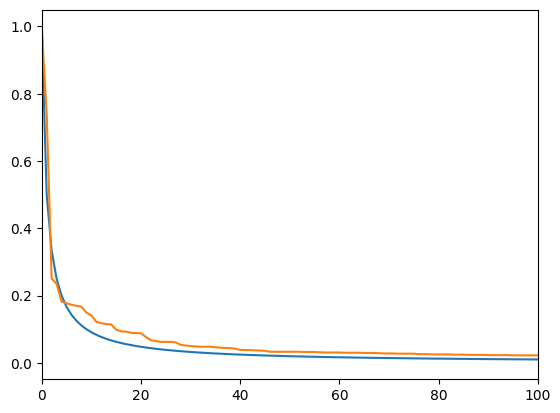

In [120]:
import matplotlib.pyplot as plt

maxfreq = t.vocab()[t.vocab().max()]
plt.plot([1/(i+1) for i in range(1000)])
plt.plot([r[1]/maxfreq for r in t.vocab().most_common(1000)])
plt.xlim(0,100)

In [121]:
k = 50
b = .57

In [122]:
heaps = [FreqDist()]
for d in c:
    heaps.append(heaps[-1]+FreqDist(word_tokenize(d)))

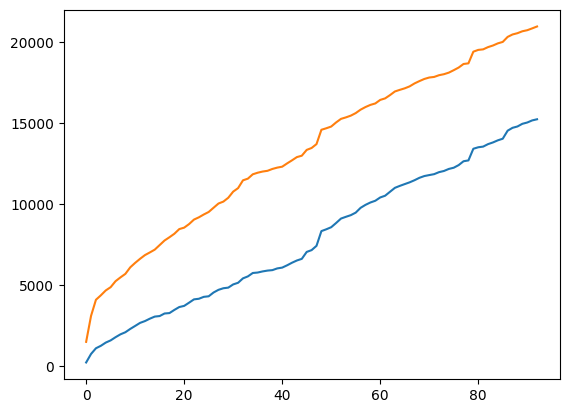

In [123]:
plt.plot([h.B() for h in heaps[1:]])
plt.plot([k*h.N()**b for h in heaps[1:]])

In [124]:
gram1 = FreqDist(ngram(word_tokenize('\n'.join(c)), 1))
gram2 = FreqDist(ngram(word_tokenize('\n'.join(c)), 2))
gram3 = FreqDist(ngram(word_tokenize('\n'.join(c)), 3))
gram4 = FreqDist(ngram(word_tokenize('\n'.join(c)), 4))
gram5 = FreqDist(ngram(word_tokenize('\n'.join(c)), 5))

In [132]:
gram1[('배터리',)]

7

In [133]:
result = ['배터리']
N = 2

for i in range(100):
    k = tuple(result[-(N-1):])
    if len(k) == 1:
        gram = gram2
    elif len(k) == 2:
        gram = gram3
    elif len(k) == 3:
        gram = gram4
    elif len(k) == 4:
        gram = gram5
    candidates = {t:gram[t] for t in findKey(k, gram)}
    candidates = sorted(candidates.items(), key=lambda r:r[1], reverse=True)
    best = candidates[0]

    # 수정 => RAG
    if len(re.findall(' '.join(best[0]), ' '.join(result))) > 2:
        if len(candidates) > 1:
            result.append(candidates[1][0][-1])
        else:
            result.append(best[0][-1])
    else:
        result.append(best[0][-1])
' '.join(result)


"배터리 등 다양한 제품군에 확대 엔진·변속기 등 다양한 제품군에 확대 엔진·변속기 등 다양한 제품군에 확대 엔진·변속기 등 미국 대통령이 26일 워싱턴 DC 백악관 집무실에서 자동차 관세 부과 '' 고 말했다 . 트럼프 미국 대통령이 26일 워싱턴 DC 백악관 집무실에서 자동차 관세 부과 '' 고 말했다 . 트럼프 미국 대통령이 26일 워싱턴 DC 백악관 집무실에서 자동차 관세 부과 '' 고 말했다 . 트럼프 미국 내 자동차 관세를 부과할 것이라고 설명했다 . 이 같은 저가 모델에 대한 관세를 부과할 것이라고 설명했다 . 이 같은 저가 모델에 대한 관세를 부과할 것이라고 설명했다 . 이 같은 저가 모델에 대한 관세를 부과하는 것 '' 이라고 말했다"

In [ ]:
# 1. 띄어쓰기
# 2. 새로운 기사에 적용해보기
#    => Error 해당 gram 존재하지 X
#    => defuaultdict(1)